In [1]:
import matplotlib.pyplot as plt
from pyspark.mllib.clustering import GaussianMixtureModel

In [2]:
# Load data from S3
lines = sc.textFile(
    name="s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv",
    minPartitions=24,
)
parts = lines.map(lambda l: l.split(","))
sources = parts.map(lambda p: (float(p[1]), float(p[2]), float(p[3]), float(p[4])))
sampled_sources = sources.sample(withReplacement=False, fraction=0.5, seed=46)

In [3]:
gmm = GaussianMixtureModel.load(sc, "gmm.model.2.large.data.subset")

In [4]:
color_codes = ["g", "m", "b", "y", "r", "k", "c"]
names_and_ansi_codes = {
    "b": [34, "blue"],
    "g": [32, "green"],
    "r": [31, "red"],
    "c": [36, "cyan"],
    "m": [35, "magenta"],
    "y": [33, "yellow"],
    "k": [30, "black"],
}

def print_class_params(_class):
    print("weight: {:.3f}".format(gmm.weights[_class]))
    print("mean: [{:.3f} {:.3f} {:.3f} {:.3f}]".format(*gmm.gaussians[_class].mu))
    cov = gmm.gaussians[_class].sigma.values
    print("covariance matrix: [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[i*4] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+1] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+2] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+3] for i in range(4)]
    ))
    print("color: \x1b[{}m{}\x1b[0m".format(*names_and_ansi_codes[color_codes[_class]]))

### Class 0

In [5]:
print_class_params(_class=0)

weight: 0.027
mean: [0.933 3.089 3.691 0.352]
covariance matrix: [ 0.302 -0.094  0.164 -0.151]
                   [-0.094  0.831 -0.439  0.068]
                   [ 0.164 -0.439  0.894 -0.480]
                   [-0.151  0.068 -0.480  0.651]
color: green


### Class 1

In [6]:
print_class_params(_class=1)

weight: 0.021
mean: [1.816 5.160 0.890 -0.011]
covariance matrix: [ 6.839 -0.742  0.633  0.059]
                   [-0.742  4.450  0.486  0.040]
                   [ 0.633  0.486  1.774  0.009]
                   [ 0.059  0.040  0.009  0.030]
color: magenta


### Class 2

In [7]:
print_class_params(_class=2)

weight: 0.128
mean: [1.771 3.197 2.622 0.040]
covariance matrix: [ 0.619  0.405  0.065  0.003]
                   [ 0.405  0.590  0.029 -0.015]
                   [ 0.065  0.029  1.186  0.011]
                   [ 0.003 -0.015  0.011  0.040]
color: blue


### Class 3

In [8]:
print_class_params(_class=3)

weight: 0.216
mean: [0.882 1.709 2.313 -0.069]
covariance matrix: [ 0.074  0.071 -0.019 -0.001]
                   [ 0.071  0.104 -0.024  0.002]
                   [-0.019 -0.024  0.617 -0.013]
                   [-0.001  0.002 -0.013  0.014]
color: yellow


### Class 4

In [9]:
print_class_params(_class=4)

weight: 0.197
mean: [1.910 2.610 3.523 0.218]
covariance matrix: [ 0.264  0.154 -0.065 -0.034]
                   [ 0.154  0.210 -0.060 -0.064]
                   [-0.065 -0.060  0.253 -0.010]
                   [-0.034 -0.064 -0.010  0.181]
color: red


### Class 5

In [10]:
print_class_params(_class=5)

weight: 0.219
mean: [2.174 2.720 2.199 0.004]
covariance matrix: [ 0.282  0.202 -0.026  0.044]
                   [ 0.202  0.179 -0.028  0.031]
                   [-0.026 -0.028  0.915 -0.023]
                   [ 0.044  0.031 -0.023  0.019]
color: black


### Class 6

In [11]:
print_class_params(_class=6)

weight: 0.192
mean: [0.871 1.784 3.505 0.236]
covariance matrix: [ 0.074  0.068 -0.010 -0.015]
                   [ 0.068  0.201 -0.040 -0.053]
                   [-0.010 -0.040  0.234  0.000]
                   [-0.015 -0.053  0.000  0.217]
color: cyan


In [12]:
sampled_sources_2 = sampled_sources.sample(withReplacement=False, fraction=0.75)

classes = gmm.predict(sampled_sources_2)
colors = classes.map(lambda c: color_codes[c])

x = sampled_sources_2.map(lambda ss: ss[0])
y = sampled_sources_2.map(lambda ss: ss[1])
z = sampled_sources_2.map(lambda ss: ss[2])
w = sampled_sources_2.map(lambda ss: ss[3])

In [13]:
def plot_2d_scatterplot(x_axis, y_axis):
    figure = plt.figure(figsize=(16,12))
    plt.xlabel(x_axis, fontsize="xx-large")
    plt.ylabel(y_axis, fontsize="xx-large")
    plt.scatter(eval(x_axis).collect(), eval(y_axis).collect(), s=0.125, c=colors.collect())
    plt.show()

### x vs. y

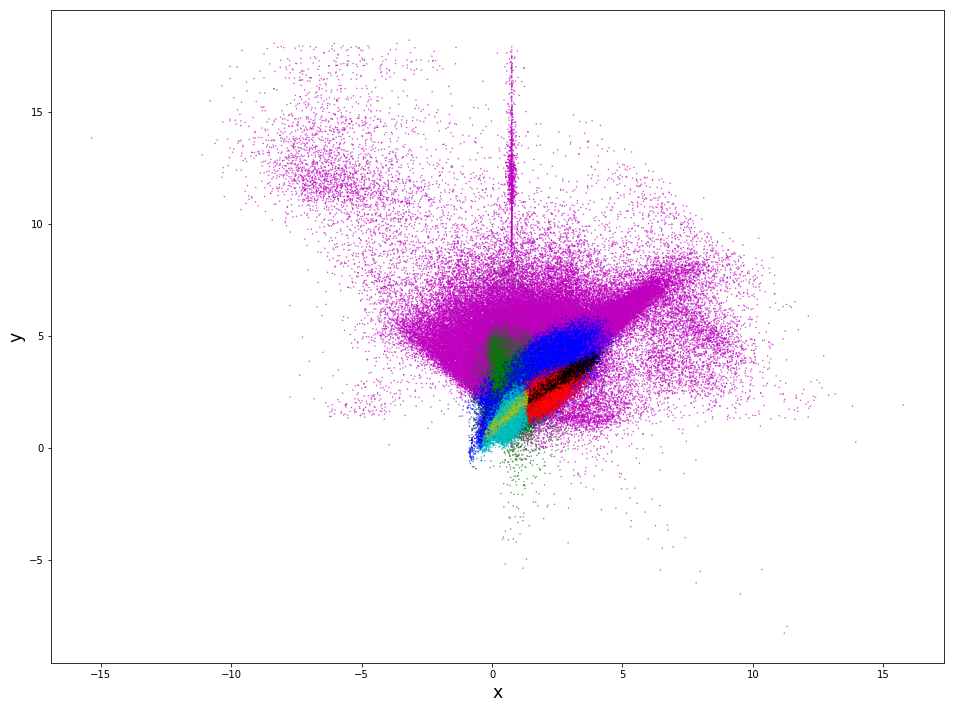

In [14]:
plot_2d_scatterplot(x_axis="x", y_axis="y")

### x vs. z

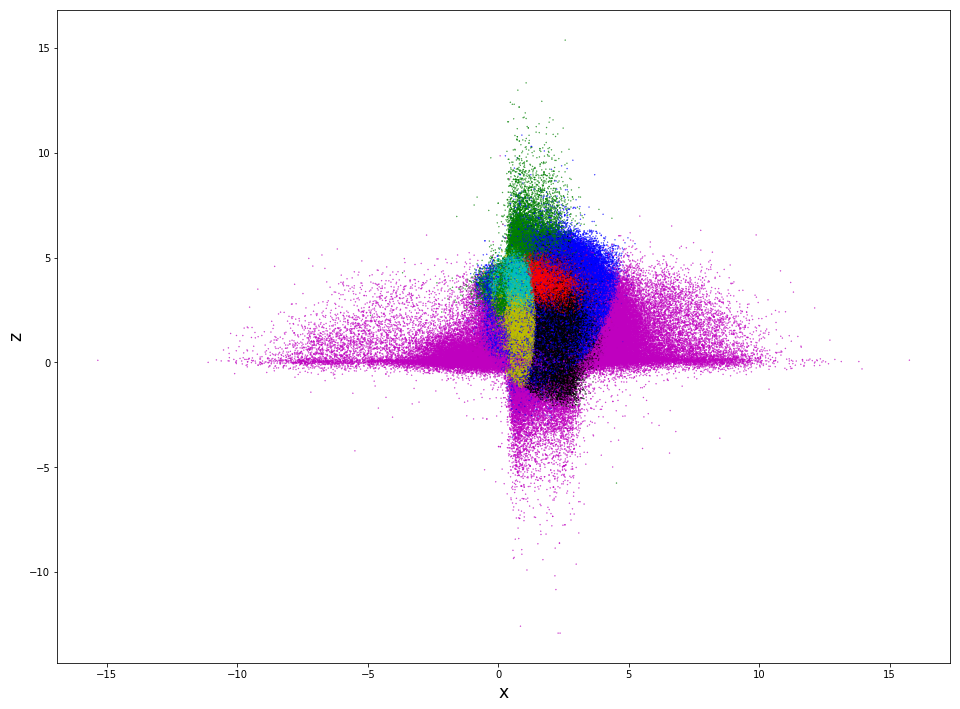

In [15]:
plot_2d_scatterplot(x_axis="x", y_axis="z")

### x vs. w

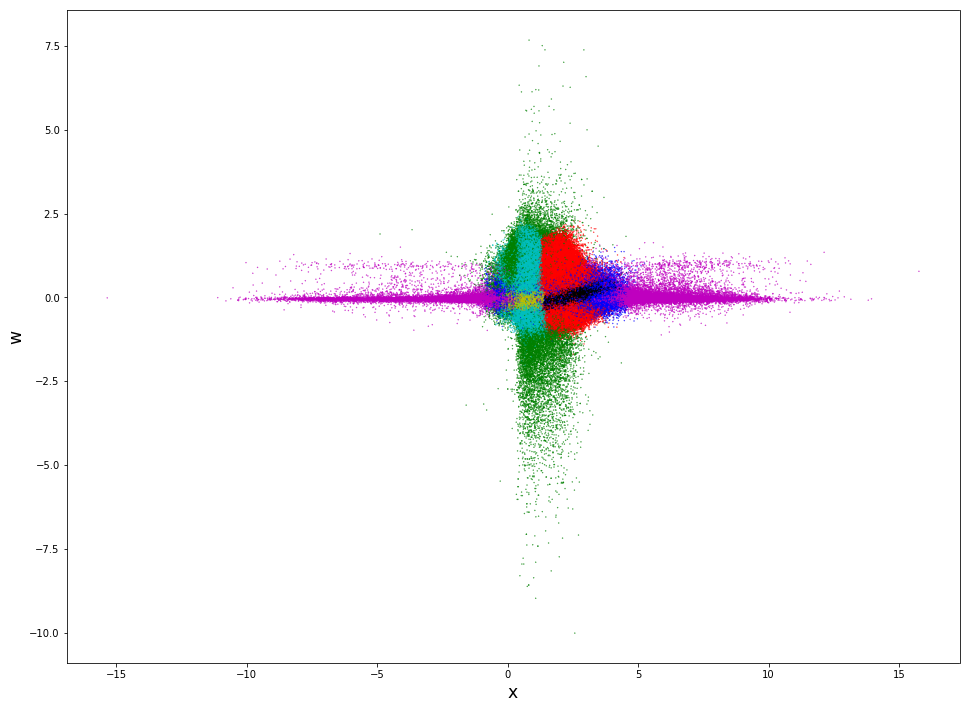

In [16]:
plot_2d_scatterplot(x_axis="x", y_axis="w")

### y vs. z

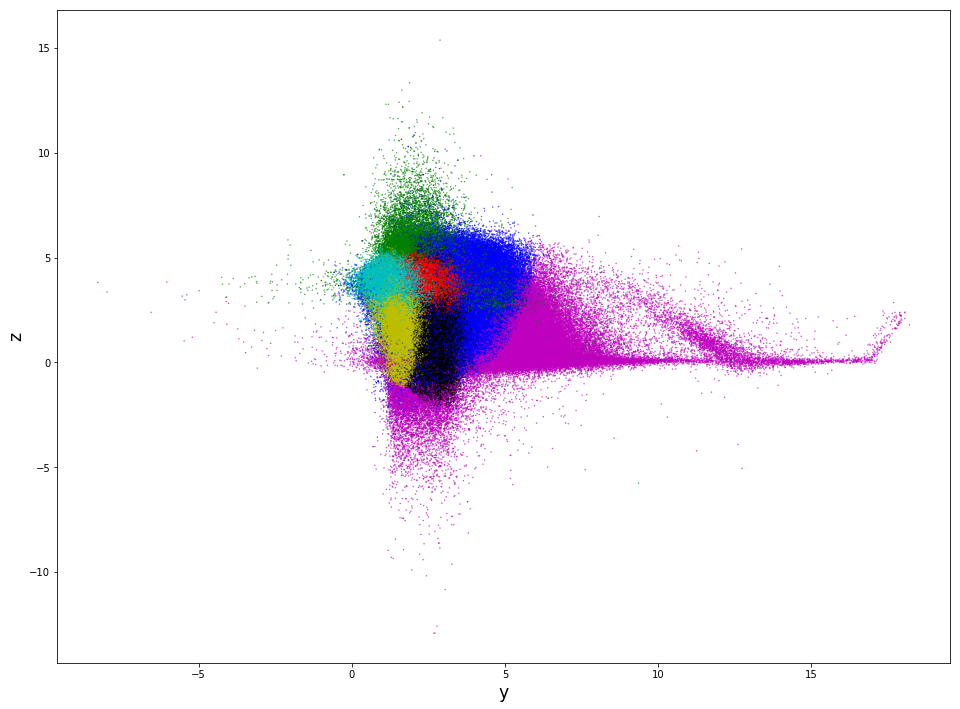

In [17]:
plot_2d_scatterplot(x_axis="y", y_axis="z")

### y vs. w

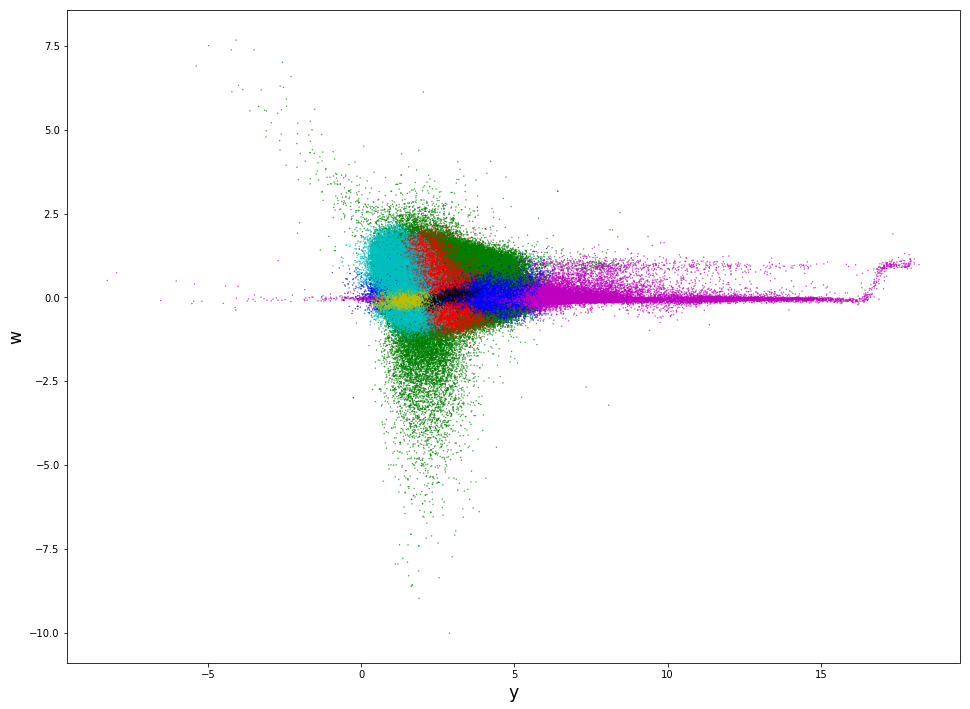

In [18]:
plot_2d_scatterplot(x_axis="y", y_axis="w")

### z vs. w

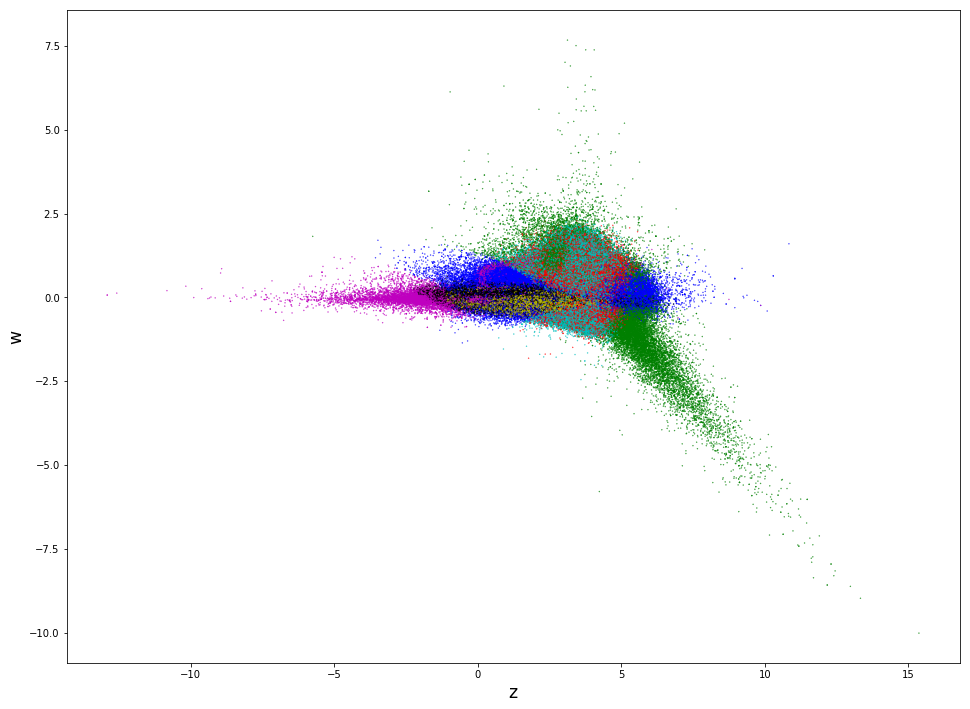

In [19]:
plot_2d_scatterplot(x_axis="z", y_axis="w")